"""
This is a sample notebook of MOBOrch in ATOMAI package-- focussed on application to simulation models
=========
<<<<<<< HEAD
Sample tutorials of running MOBO models, with numerical examples.
Jupiter notebook of main.py script
=======
Developed in Pytorch environment
Prepared by Arpan Biswas (email: arpanbiswas52@gmail.com)
"""

In [12]:
import numpy as np
import torch
from matplotlib import pyplot as plt

from mAForch import mAcqFunc
from mGPorch import mGPtrainer
from paretorch import Pareto
from utils import plotPareto

In [13]:
### Numerical Examples - 1) ZDT1 and 2)2-D Six-hump camel back - Inversed-Ackley's Path (6HC-IAP)

def ZDT1(x1, x2):
    f1 = x1
    g = 1 + 9 * x2
    f2 = 1 - np.sqrt(f1 / g)
    return f1, f2


def Sixhump_Camelback_inverse_Ackley(x1, x2):
    a = 20
    b = 0.2
    c = 2 * np.pi
    f1 = (4 - 2.1 * x1 ** 2 + (x1 ** 4) / 3) * x1 ** 2 + x1 * x2 + (-4 + 4 * x2 ** 2) * x2 ** 2
    f2 = a * np.exp(-b * np.sqrt((x1 ** 2 + x2 ** 2) / 2)) + np.exp((np.cos(c * x1) + np.cos(c * x2)) / 2) - a - np.exp(
        1)
    return f1, f2


In [14]:
def initial_eval(fun="ZDT1", nrow=100, istart=20, BATCH_SIZE=1, total_eval=500):
    N = int(np.round(total_eval / BATCH_SIZE))
    num_rows = nrow
    num_start = istart
    n_obj = 2
    m = 0

    if fun == 'ZDT1':
        X1 = np.linspace(0, 1, num_rows)
        X2 = np.linspace(0, 1, num_rows)

    elif fun == 'HCIAP':
        X1 = np.linspace(-3, 3, num_rows)
        X2 = np.linspace(-2, 2, num_rows)

    else:
        print("Error: Provide function as ZDT1 or HCIAP")

    X = [X1, X2]
    X_feas = np.zeros((X[0].shape[0] * X[1].shape[0], n_obj))
    k = 0
    for t1 in range(0, X[0].shape[0]):
        for t2 in range(0, X[1].shape[0]):
            X_feas[k, 0] = X[0][t1]
            X_feas[k, 1] = X[1][t2]
            k = k + 1

    idx = np.random.choice(len(X_feas) - 1, size=num_start, replace=False)
    train_X = X_feas[idx]
    train_Y = np.zeros((num_start, n_obj))
    train_Y_norm = np.zeros((num_start, n_obj))

    for i in range(0, num_start):
        if fun == 'ZDT1':
            train_Y[i, 0], train_Y[i, 1] = ZDT1(train_X[i, 0], train_X[i, 1])
            m = m + 1

        elif fun == 'HCIAP':
            train_Y[i, 0], train_Y[i, 1] = Sixhump_Camelback_inverse_Ackley(train_X[i, 0], train_X[i, 1])
            m = m + 1

        else:
            print("Error: Provide function as ZDT1 or HCIAP")

    for i in range(0, train_Y.shape[1]):
        train_Y_norm[:, i] = (train_Y[:, i] - np.min(train_Y[:, i])) / (np.max(train_Y[:, i]) - np.min(train_Y[:, i]))

    train_X, test_X, train_Y, train_Y_norm, idx, m, N = torch.from_numpy(train_X), torch.from_numpy(
        X_feas), torch.from_numpy(train_Y), torch.from_numpy(train_Y_norm), idx, m, N

    return train_X, test_X, train_Y, train_Y_norm, idx, m, N

# *********************************************Run Script*************************************** #

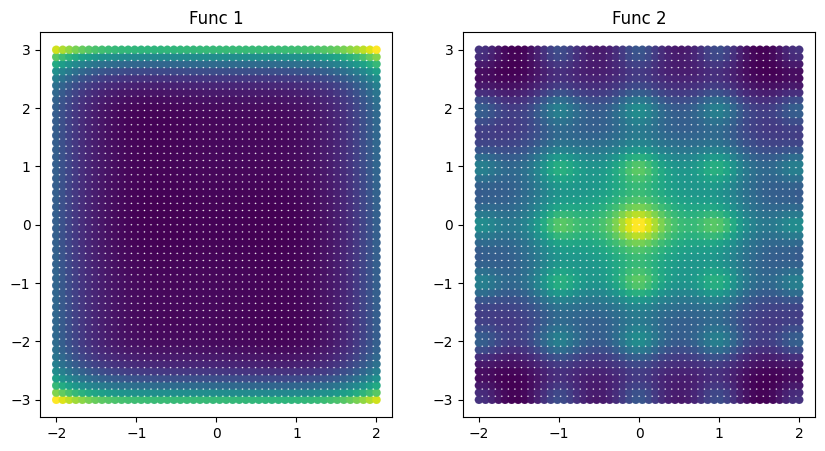

In [18]:
tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

n_obj = 2  # Set number of objectives.
BATCH_SIZE = 1
bound = torch.tensor([[-3.0, -2.0], [3.0, 2.0]])

# Run initial evaluations
train_X, test_X, train_Y, train_Y_norm, idx, m, N = initial_eval(fun="HCIAP", nrow=50, istart=20, BATCH_SIZE=1,
                                                                 total_eval=100)

hvs = []  # Initializing hypervolume
rf = torch.tensor([0.0] * n_obj) - 0.001  # rf is the worst solution of the objectives.
full_grid = test_X

# Create ground truth image -- This part is only for validation and not need to code for BO/MOBO
gtruth = torch.zeros((full_grid.shape[0], n_obj))
for i in range(0, full_grid.shape[0]):
    gtruth[i, 0], gtruth[i, 1] = Sixhump_Camelback_inverse_Ackley(full_grid[i, 0], full_grid[i, 1])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(full_grid[:, 1], full_grid[:, 0], c=gtruth[:, 0], cmap='viridis', linewidth=0.1)
ax[0].set_title("Func 1")
ax[1].scatter(full_grid[:, 1], full_grid[:, 0], c=gtruth[:, 1], cmap='viridis', linewidth=0.1)
ax[1].set_title("Func 2")
plt.show()

# *********************************************Run MOBO*************************************** #

Evaluation: 21


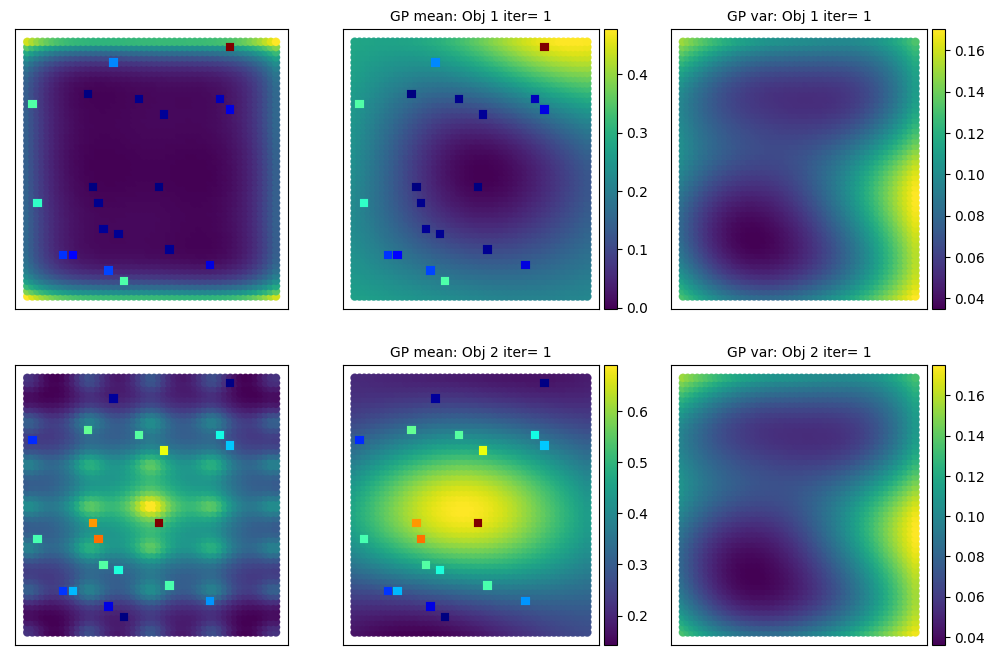

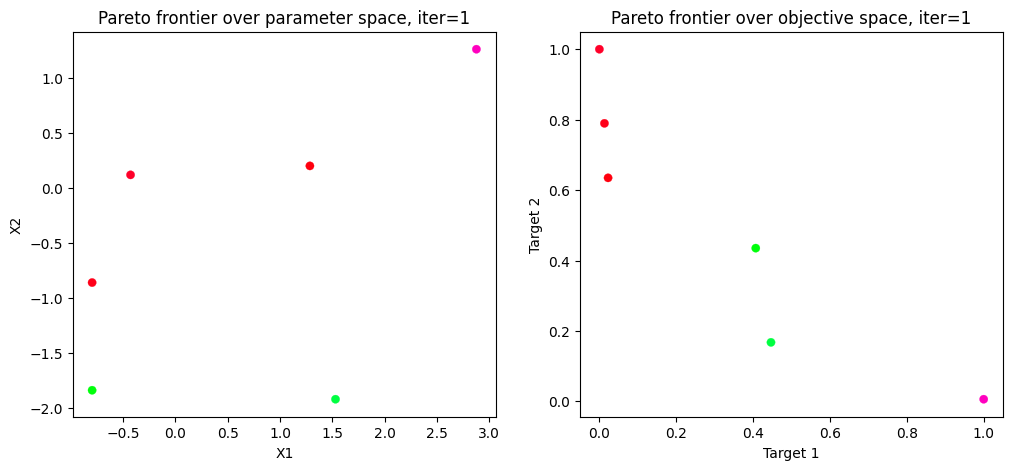

Evaluation: 22
Evaluation: 23
Evaluation: 24
Evaluation: 25
Evaluation: 26
Evaluation: 27
Evaluation: 28
Evaluation: 29
Evaluation: 30


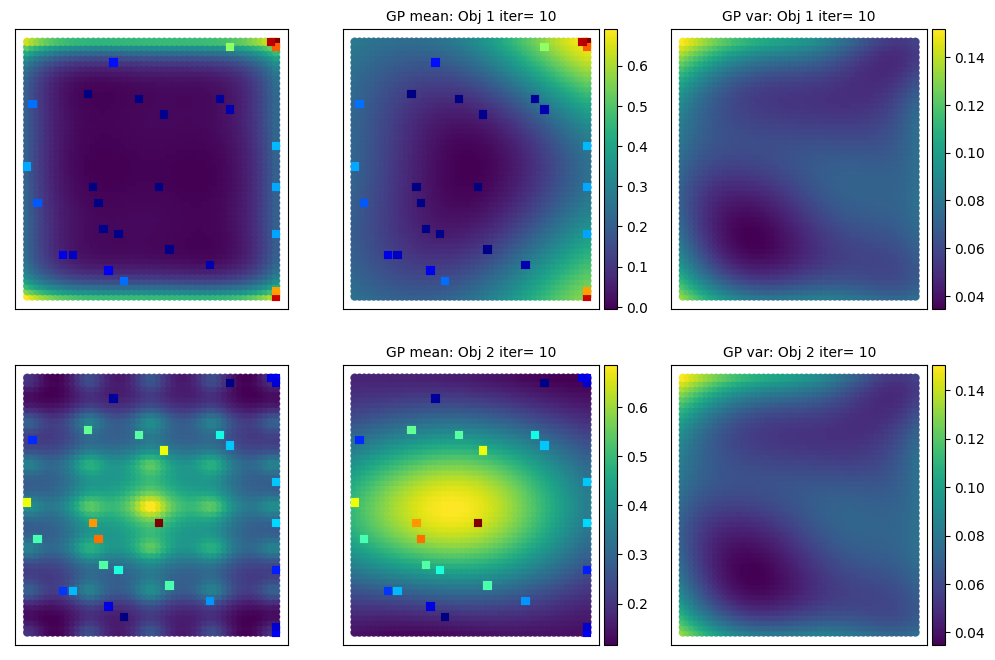

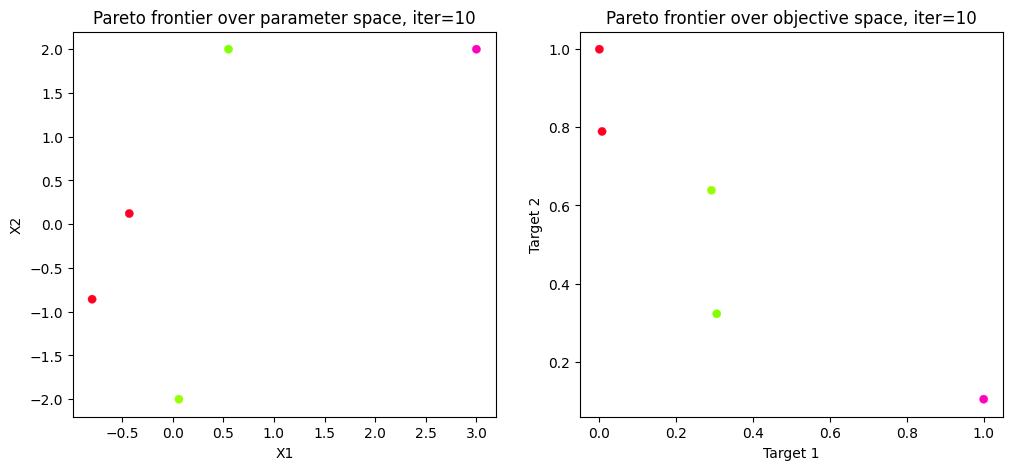

Evaluation: 31
Evaluation: 32
Evaluation: 33
Evaluation: 34
Evaluation: 35
Evaluation: 36
Evaluation: 37
Evaluation: 38
Evaluation: 39
Evaluation: 40


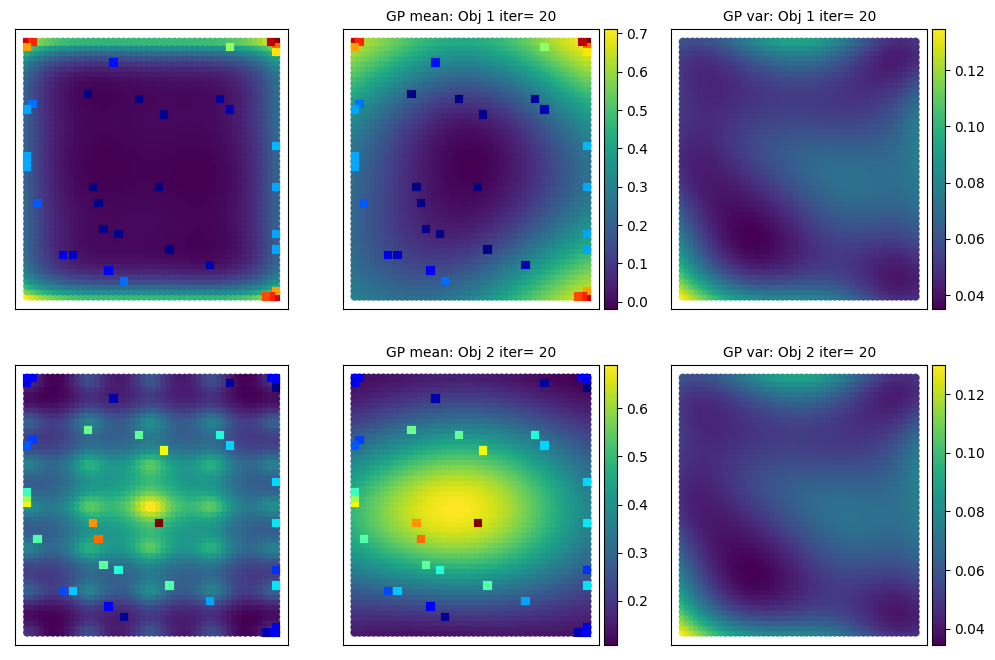

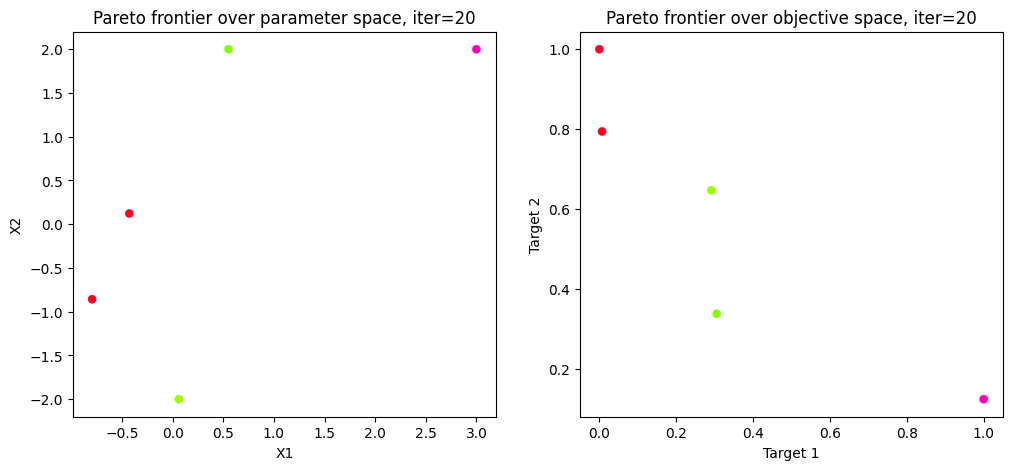

Evaluation: 41
Evaluation: 42
Evaluation: 43
Evaluation: 44
Evaluation: 45
Evaluation: 46
Evaluation: 47
Evaluation: 48
Evaluation: 49
Evaluation: 50


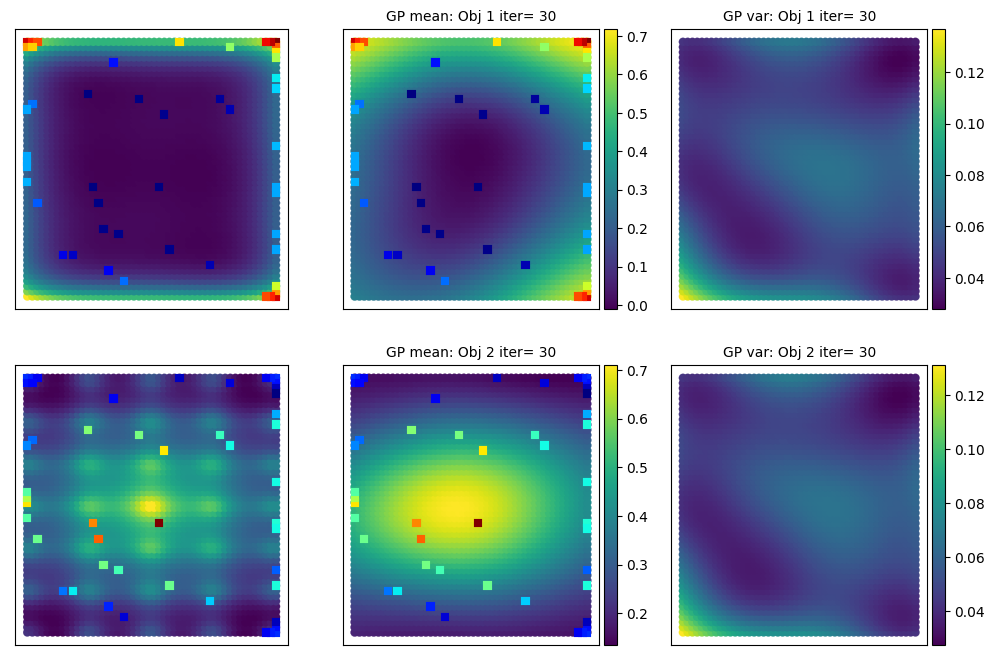

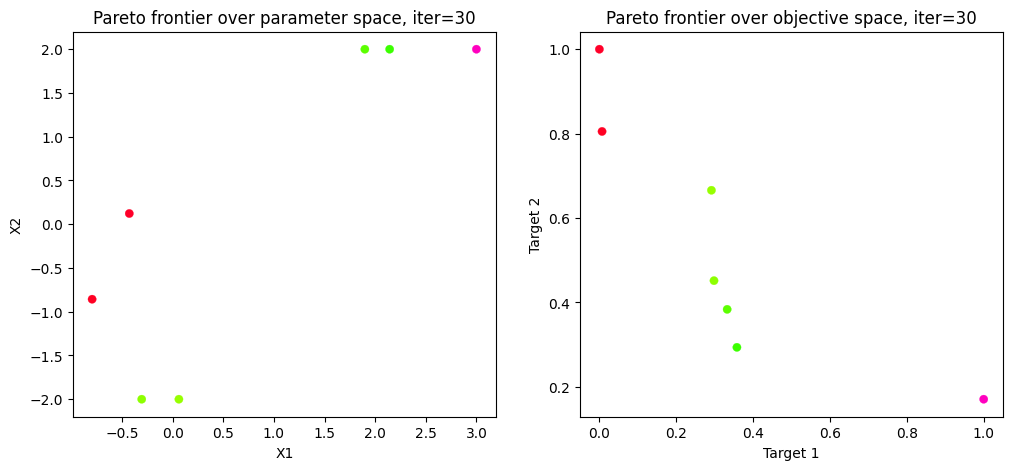

Evaluation: 51
Evaluation: 52
Evaluation: 53
Evaluation: 54
Evaluation: 55
Evaluation: 56
Evaluation: 57
Evaluation: 58
Evaluation: 59
Evaluation: 60


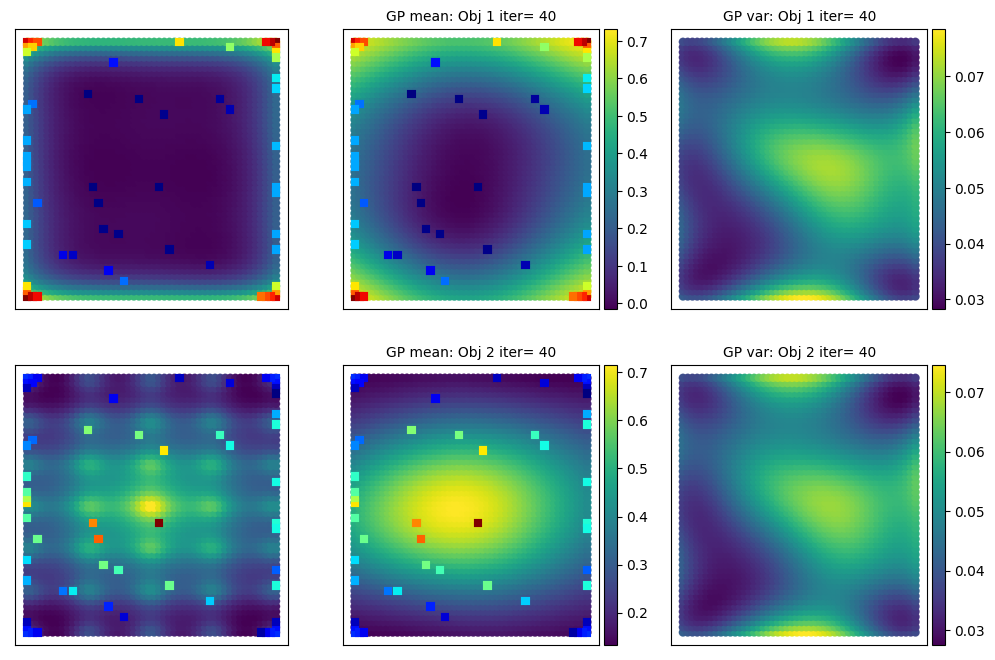

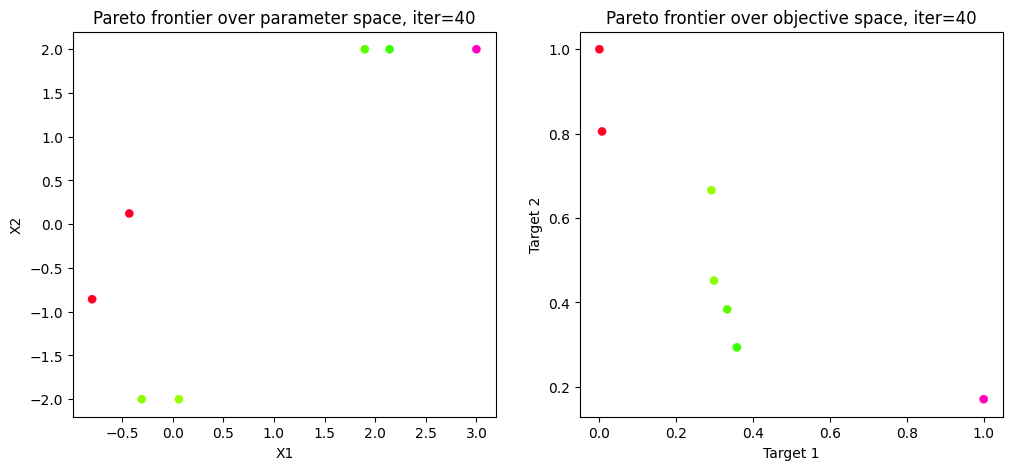

Evaluation: 61
Evaluation: 62
Evaluation: 63
Evaluation: 64
Evaluation: 65
Evaluation: 66
Evaluation: 67
Evaluation: 68
Evaluation: 69
Evaluation: 70


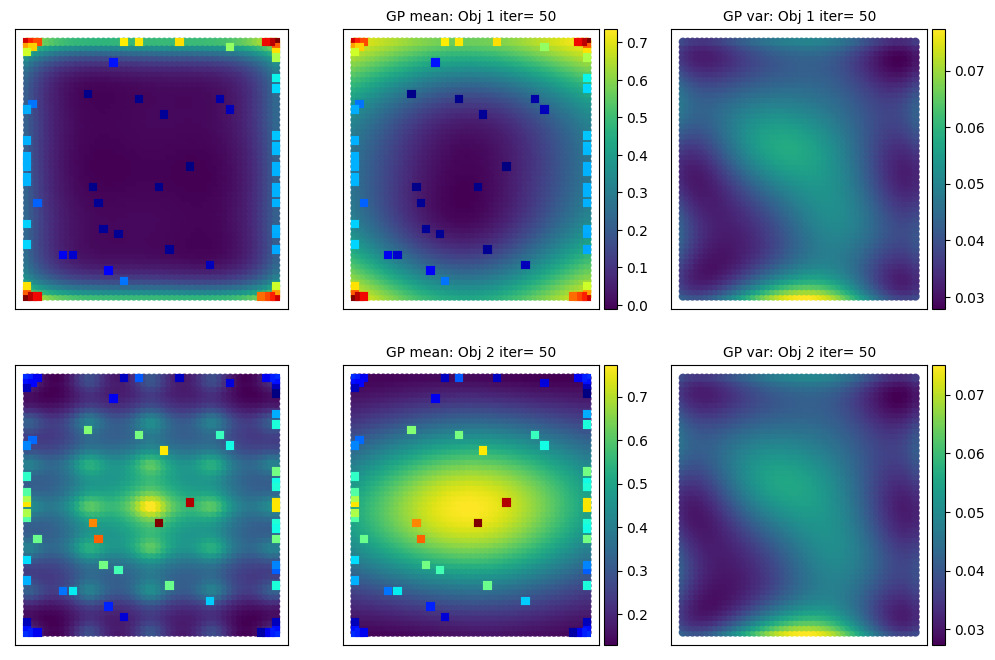

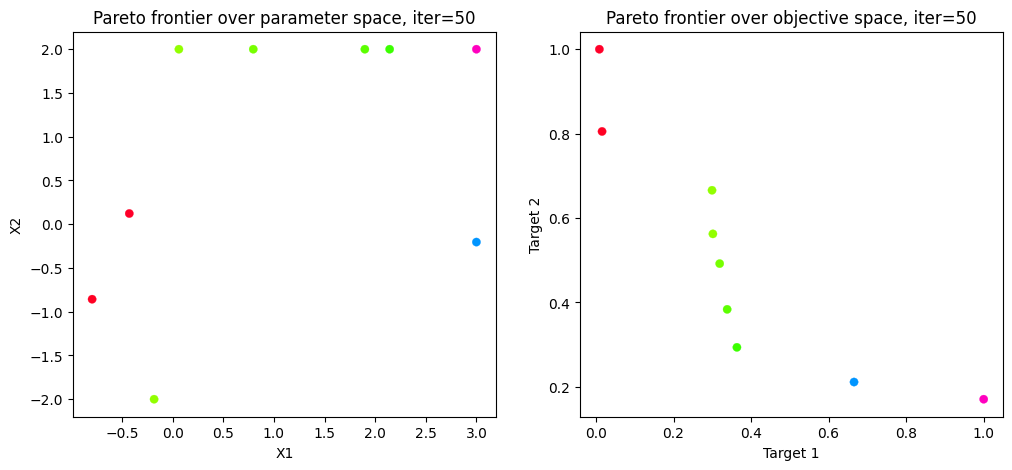

Evaluation: 71
Evaluation: 72
Evaluation: 73
Evaluation: 74
Evaluation: 75
Evaluation: 76
Evaluation: 77
Evaluation: 78
Evaluation: 79
Evaluation: 80


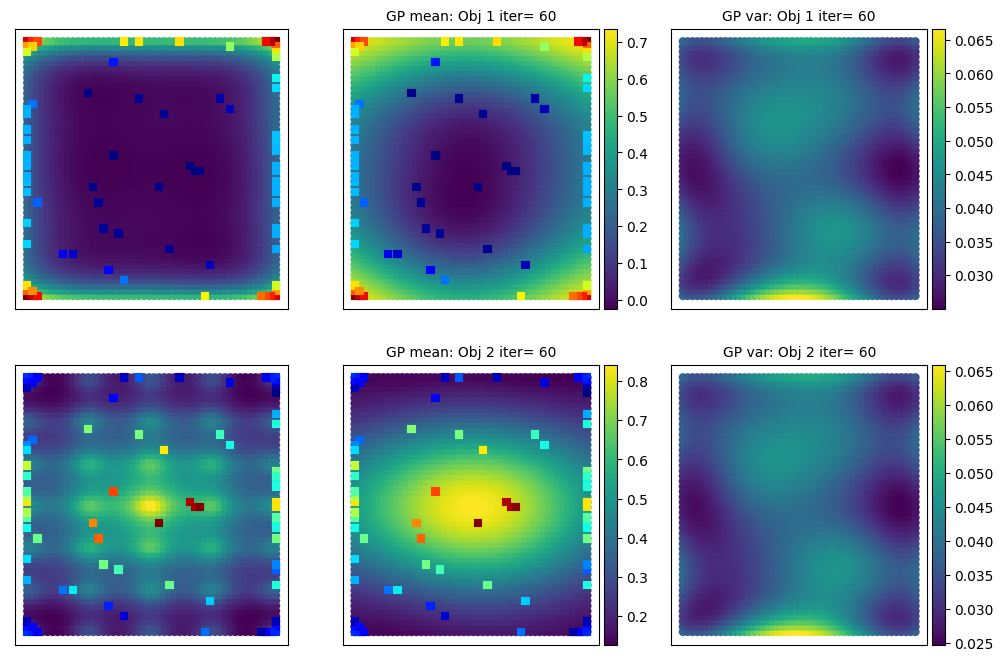

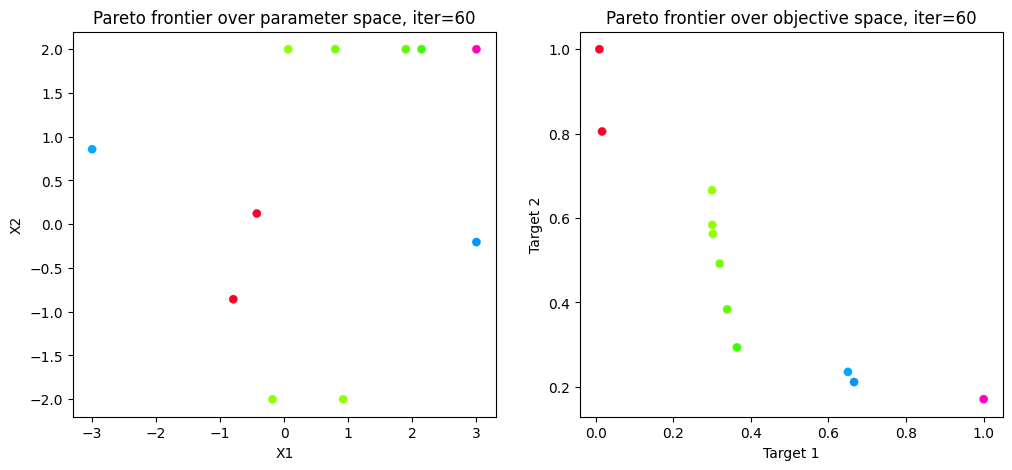

Evaluation: 81
Evaluation: 82
Evaluation: 83
Evaluation: 84
Evaluation: 85
Evaluation: 86
Evaluation: 87
Evaluation: 88
Evaluation: 89
Evaluation: 90


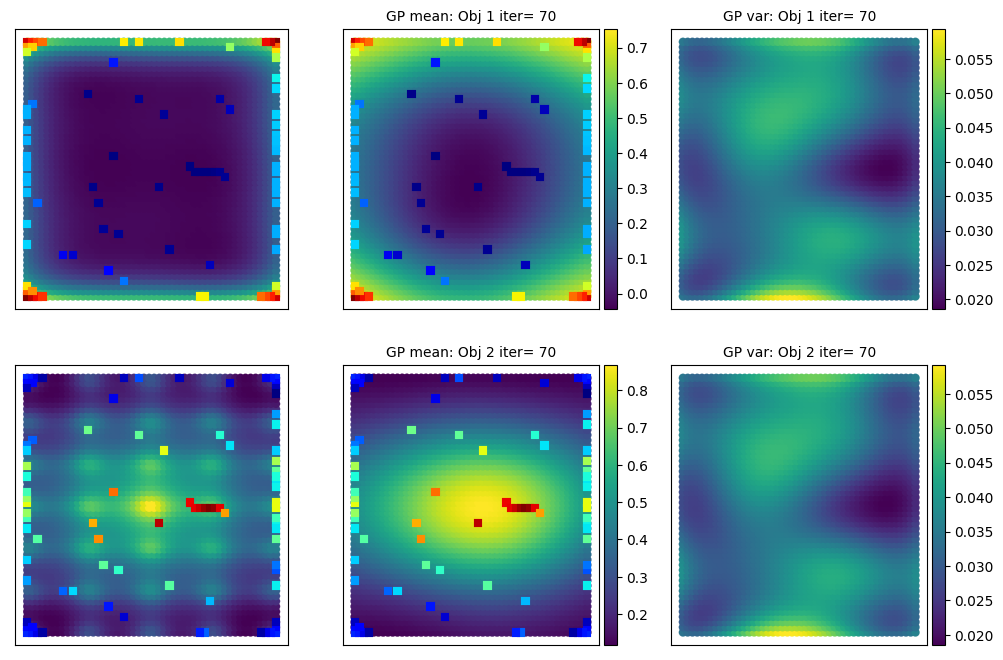

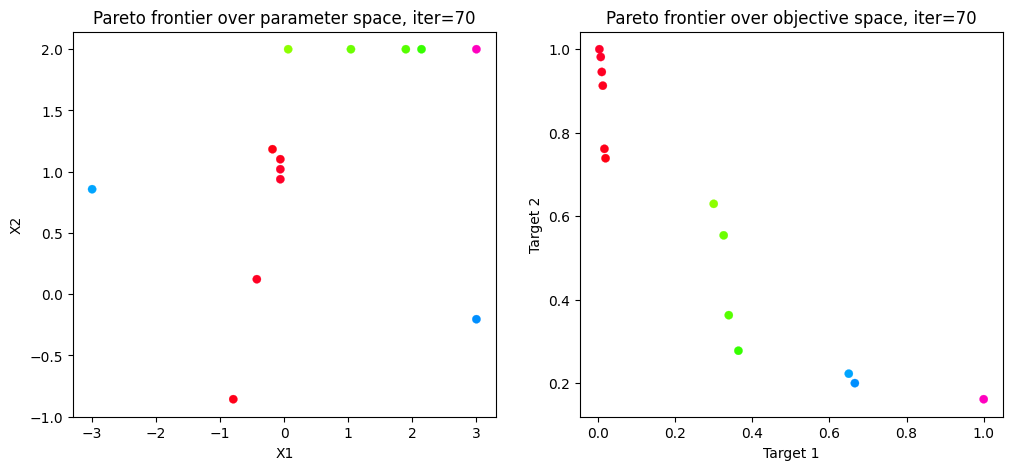

Evaluation: 91
Evaluation: 92
Evaluation: 93
Evaluation: 94
Evaluation: 95
Evaluation: 96
Evaluation: 97
Evaluation: 98
Evaluation: 99
Evaluation: 100


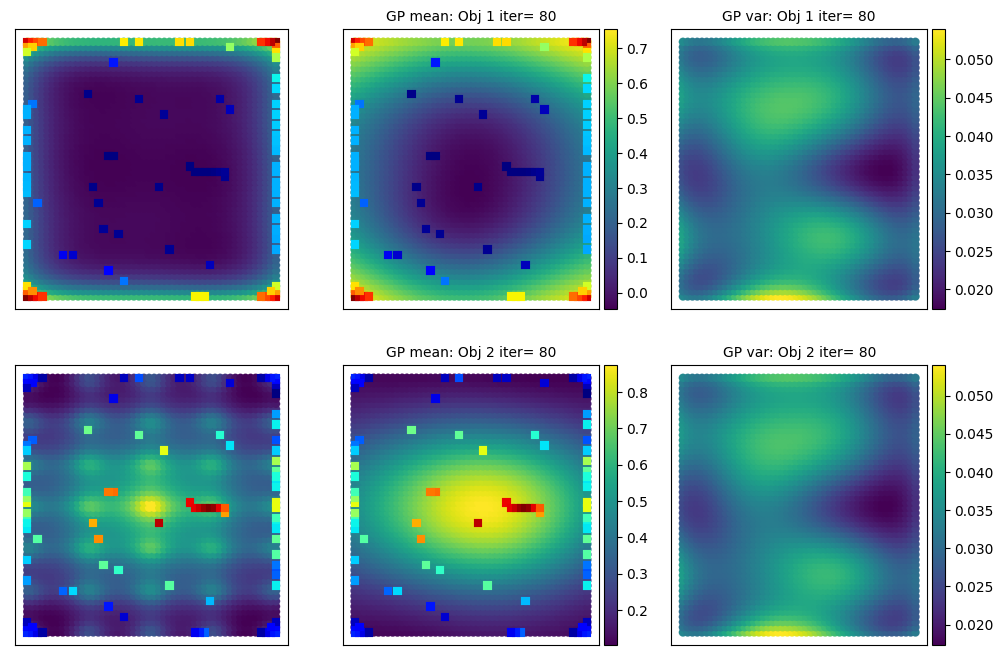

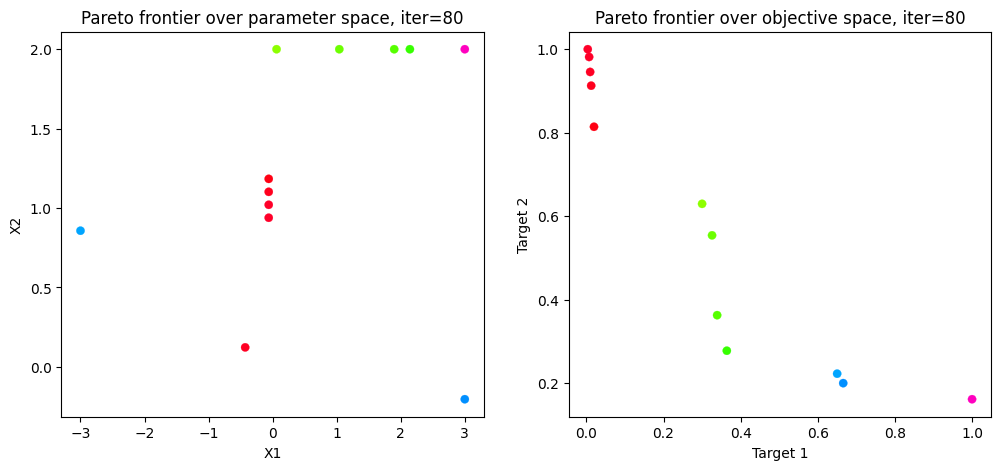

Evaluation: 101
Evaluation: 102
Evaluation: 103
Evaluation: 104
Evaluation: 105
Evaluation: 106
Evaluation: 107
Evaluation: 108
Evaluation: 109
Evaluation: 110


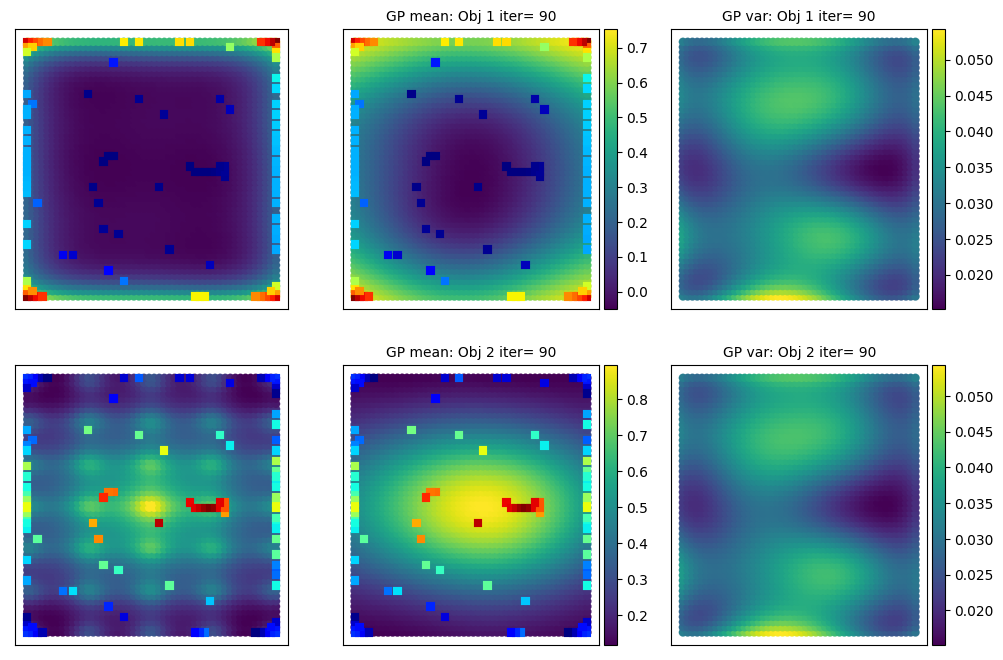

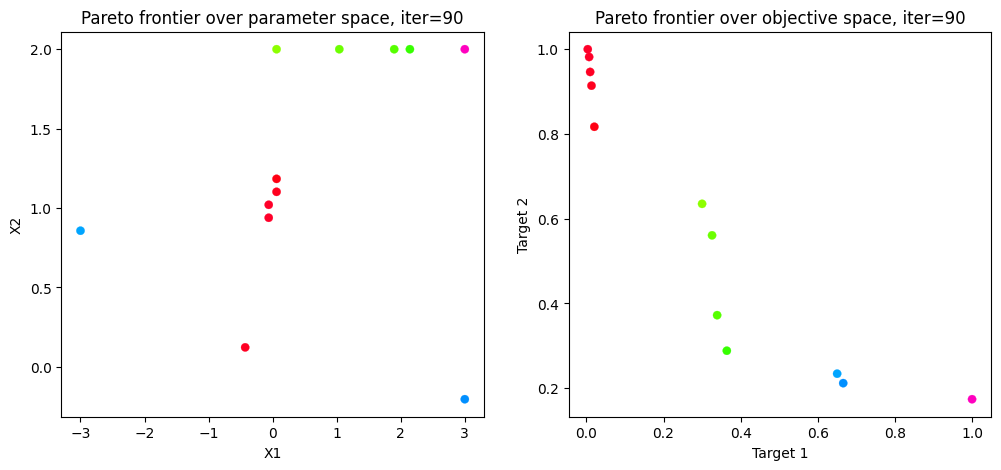

Evaluation: 111
Evaluation: 112
Evaluation: 113
Evaluation: 114
Evaluation: 115
Evaluation: 116
Evaluation: 117
Evaluation: 118
Evaluation: 119
Evaluation: 120


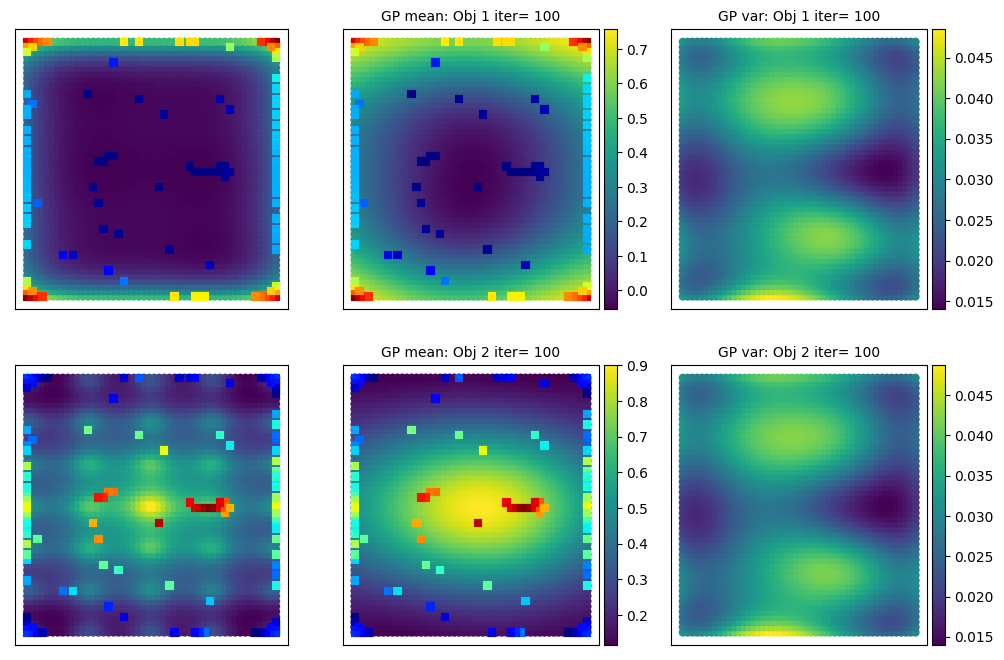

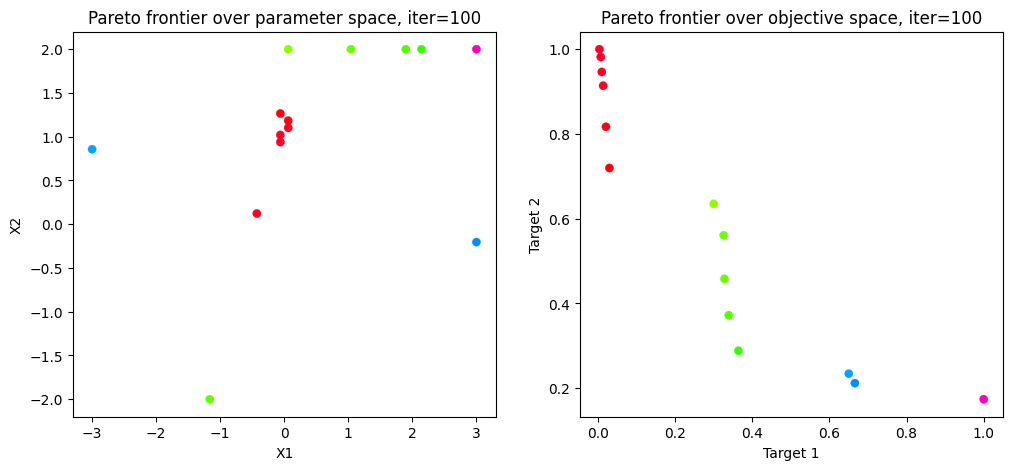

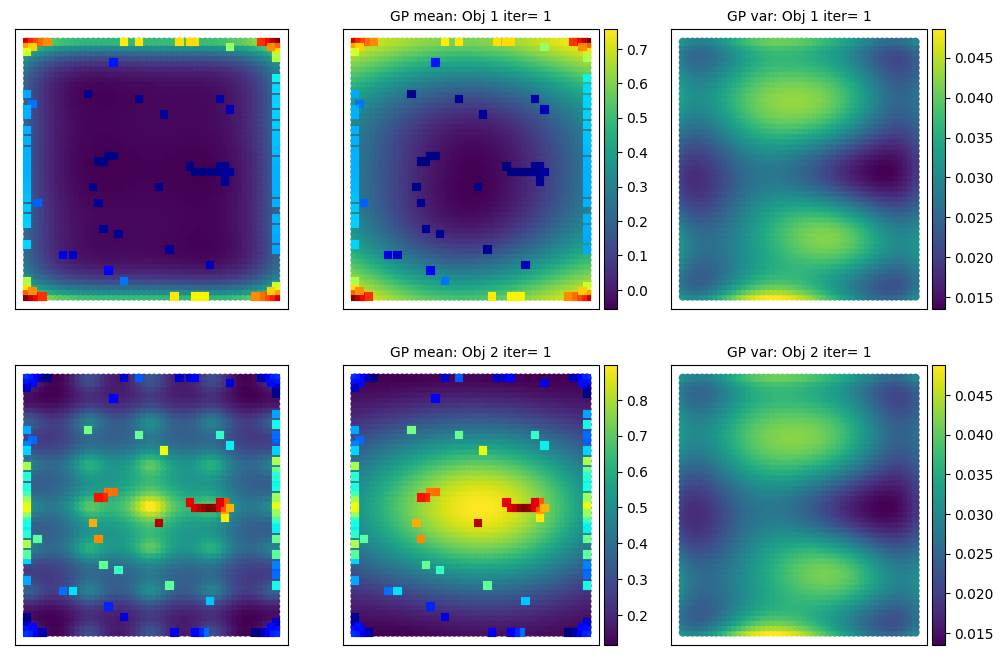

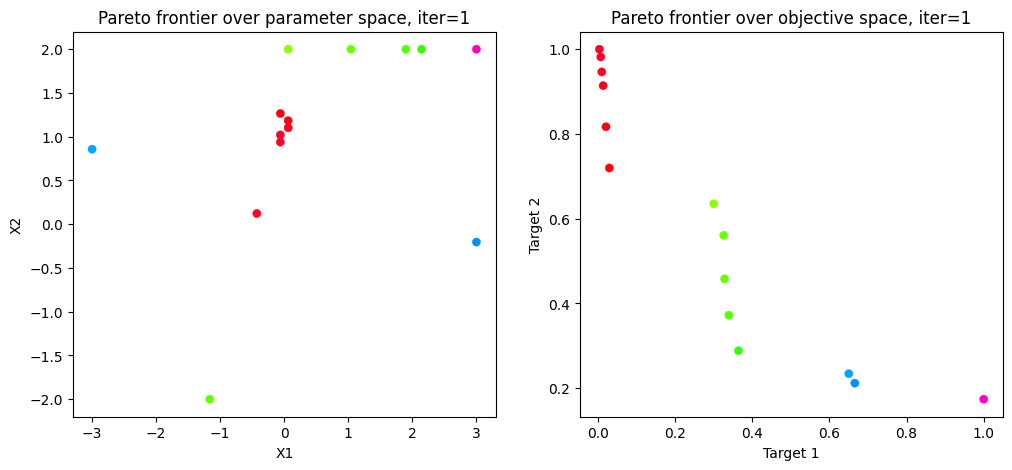

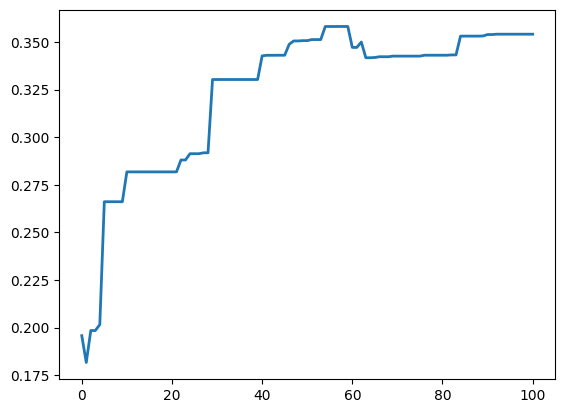

0.35412177443504333


In [19]:
# Fit surrogate model
gp_surro = mGPtrainer.train_GP(train_X, train_Y_norm, kfun="rbf", lr=0.01)

for i in range(1, N + 1):
    print("Evaluation: " + str(m + 1))
    # Calculate posterior for analysis for intermediate iterations
    y_pred_means, y_pred_vars = mGPtrainer.cal_posteriorGP(gp_surro, test_X)

    # Compute pareto and hypervolume
    pareto_y, pareto_ind, hvs = Pareto.estimate(train_X, train_Y_norm, hvs, rf=rf)

    # Plot every tenth iteration after running the evaluation
    if (i == 1) or ((i % 10) == 0):
        y_pred_means_full, y_pred_vars_full = mGPtrainer.cal_posteriorGP(gp_surro, full_grid)
        iresults = [pareto_y, pareto_ind, train_X, train_Y_norm, full_grid, y_pred_means_full, y_pred_vars_full, gtruth,
                    i, idx, hvs]
        # np.save("iresults.npy", iresults)
        plotPareto(iresults)
    # calculate acquisition function
    # acq_cand, acq_val = mAcqFunc.wtbei(y_pred_means, y_pred_vars, train_Y_norm)
    acq_cand, acq_val = mAcqFunc.qehvi(gp_surro, test_X, train_Y_norm, bound=bound, rf=rf, optim='discrete')
    # acq_cand, acq_val = mAcqFunc.qparego(gp_surro, test_X, train_Y_norm, bound=bound, optim='cont')

    val = acq_val
    ind = acq_cand
    idx = np.hstack((idx, ind))
    # print(idx)

    # Find next point which maximizes the learning through exploration-exploitation
    # Check for convergence
    if val < 0:  # Stop for negligible expected improvement. Currently this part is committed out
        print("Model converged due to sufficient learning over search space ")
        break
    else:
        # Augment data and run evaluation at new sample
        next_feval = torch.empty(1, n_obj)
        train_X = torch.vstack((train_X, test_X[ind, :]))
        # train_X = torch.vstack((train_X, acq_cand))
        next_feval[0, 0], next_feval[0, 1] = Sixhump_Camelback_inverse_Ackley(train_X[-1, 0], train_X[
            -1, 1])  # Change function for other problems
        train_Y = torch.vstack((train_Y, next_feval))
        train_Y_norm = torch.zeros_like(train_Y)
        for i in range(0, train_Y.shape[1]):
            train_Y_norm[:, i] = (train_Y[:, i] - torch.min(train_Y[:, i])) / (
                    torch.max(train_Y[:, i]) - torch.min(train_Y[:, i]))
        m = m + 1

        # Remove evaluated samples from test data (Avoid repeated sampling)
        test_X = torch.cat([test_X[:ind], test_X[ind + 1:]])  # Input

        # Updating GP with augmented training data
        gp_surro = mGPtrainer.train_GP(train_X, train_Y_norm, kfun="rbf", lr=0.01)

# Final posterior prediction after all the sampling done

if i == N:
    print("\n\n#####----Max. sampling reached, model stopped----#####")

# Optimal GP learning
gp_opt = gp_surro
# Posterior calculation with converged GP model
y_pred_means_full, y_pred_vars_full = mGPtrainer.cal_posteriorGP(gp_surro, full_grid)
# Plotting functions to check final iteration
pareto_y_opt, pareto_ind_opt, hvs = Pareto.estimate(train_X, train_Y_norm, hvs, rf=rf)
optim_results = [pareto_y_opt, pareto_ind_opt, train_X, train_Y_norm, full_grid, y_pred_means_full, y_pred_vars_full,
                 gtruth, i, idx, hvs]
plotPareto(optim_results)
plt.plot(hvs, linewidth=2)
plt.show()
print(hvs[-1])

In [20]:
hvs_ground = []
pareto_y_ground, pareto_ind_ground, hvs_ground = Pareto.estimate(train_X, train_Y_norm, hvs_ground, rf=rf)

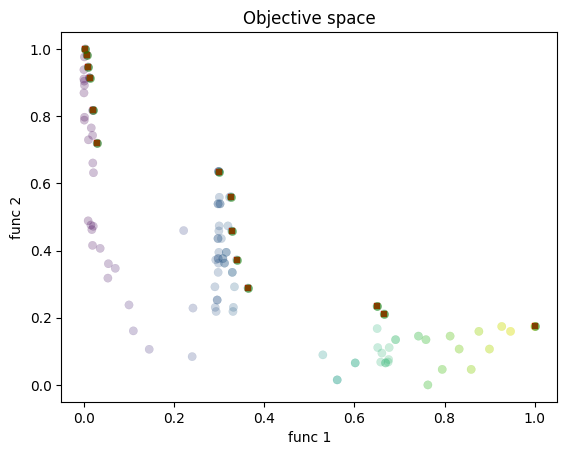

[0.35412177443504333]


In [32]:
plt.scatter(train_Y_norm[:, 0],train_Y_norm[:, 1], c= train_Y_norm[:, 0],cmap='viridis', alpha= 0.25, linewidth=0.2)
plt.scatter(pareto_y[:, 0], pareto_y[:, 1], marker='s', s=20, c='red', linewidth=0.2)
plt.scatter(pareto_y_ground[:, 0], pareto_y_ground[:, 1], c='g', alpha=0.5, linewidth=0.2)
plt.xlabel("func 1")
plt.ylabel("func 2")
plt.title("Objective space")
plt.show()

print(hvs_ground)

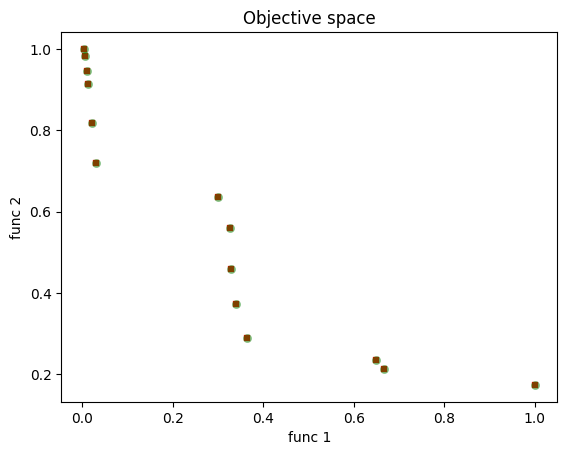

In [33]:
plt.scatter(pareto_y[:, 0], pareto_y[:, 1], marker='s', s=20, c='red', linewidth=0.2)
plt.scatter(pareto_y_ground[:, 0], pareto_y_ground[:, 1], c='g', alpha=0.5, linewidth=0.2)
plt.xlabel("func 1")
plt.ylabel("func 2")
plt.title("Objective space")
plt.show()
